<a href="https://colab.research.google.com/github/dakim01/My-Data-projects/blob/master/CNN_WildFire_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wild Fire Image Detection From Satellite Images

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!  cp kaggle.json ~/.kaggle/

In [ ]:
!  chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download abdelghaniaaba/wildfire-prediction-dataset --force

100% 1.44G/1.45G [00:13<00:00, 143MB/s]
100% 1.45G/1.45G [00:13<00:00, 112MB/s]


# Loading Important libraries

In [ ]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
train_path = "/content/train/train"
valid_path = "/content/train/valid"
test_path = "/content/train/test"

# Loading Images In Batches

In [ ]:
image_shape = (350,350,3)
N_CLASSES = 2
BATCH_SIZE = 32
category=['nowildfire','wildfire']
# loading training data and rescaling it using ImageDataGenerator
train_datagen = ImageDataGenerator(dtype='float32', rescale= 1./255.)
train_generator = train_datagen.flow_from_directory(train_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (350,350),
                                                   class_mode = 'categorical',
                                                    shuffle=True)

# loading validation data and rescaling it using ImageDataGenerator
valid_datagen = ImageDataGenerator(dtype='float32', rescale= 1./255.)
valid_generator = valid_datagen.flow_from_directory(valid_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (350,350),
                                                   class_mode = 'categorical',
                                                    shuffle=True)

# loading test data and rescaling it using ImageDataGenerator
test_datagen = ImageDataGenerator(dtype='float32', rescale = 1.0/255.0)
test_generator = test_datagen.flow_from_directory(test_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (350,350),
                                                   class_mode = 'categorical',
                                                   shuffle=True)


Found 30250 images belonging to 2 classes.
Found 6300 images belonging to 2 classes.
Found 6300 images belonging to 2 classes.


## Image of WildeFire Vs NoWildFire In Train Data

In [ ]:
image,label=test_generator.next()
fig,ax=plt.subplots(6,6,figsize=(50,50))
ax=ax.ravel()
i=0
for img,lbl in zip(image,label):
    ax[i].imshow(img)
    ax[i].set_title(category[np.argmax(lbl)],fontdict={'size':60})
    i+=1

# Count of WildFire Vs NoWildfire

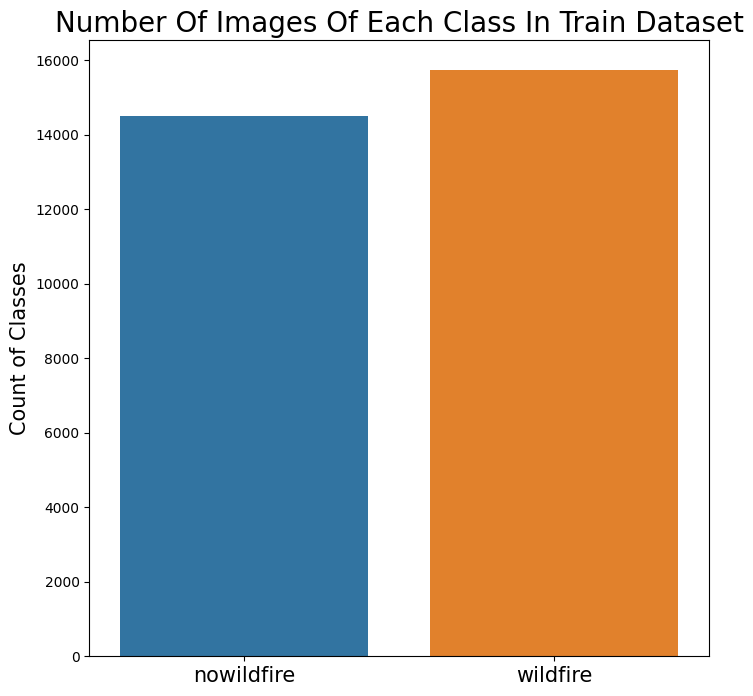

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,8))
sns.countplot(x=train_generator.classes)
plt.ylabel("Count of Classes",fontdict={'size':15})
plt.xticks([0,1],['nowildfire','wildfire'],fontdict={'size':15})
plt.title("Number Of Images Of Each Class In Train Dataset",fontdict={'size':20})
plt.show()

# Aggumemting Data

In [ ]:
# datagen = ImageDataGenerator(
#         featurewise_center=False,  # set input mean to 0 over the dataset
#         samplewise_center=False,  # set each sample mean to 0
#         featurewise_std_normalization=False,  # divide inputs by std of the dataset
#         samplewise_std_normalization=False,  # divide each input by its std
#         zca_whitening=False,  # apply ZCA whitening
#         rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
#         zoom_range = 0.2, # Randomly zoom image
#         width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
#         height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
#         horizontal_flip = True,  # randomly flip images
#         vertical_flip=False)  # randomly flip images


# datagen.fit(train_generator)

# CNN Architecture

In [ ]:
# model creation
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=image_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=image_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(len(category), activation='softmax'))


# Compiling Model And Getting Model Summary
 - <b>categorical_crossentrophy<b> as loss as it is multiclass classification and will return a array with probability of all classes.
 - <b>adam<b> is one of fameous optimizer .
 - <b>metric<b> here we are using accuracy for evaluation as metric.

In [ ]:
#compile model
model.compile(
loss='categorical_crossentropy',
optimizer='adam',
metrics=['accuracy'])

#model summary

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 348, 348, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 174, 174, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 172, 172, 64)      18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 86, 86, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 84, 84, 32)        18464     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 42, 42, 32)      

# Training Model
- <b>Epochs: <b>It refers to the one cycle of all training data through neural network.
- <b>Batch_size: <b>It refers to the number of example after which weights should be modified.
- <b>EarlyStopping: <b>It lets the model stop training if a given paramter is not changing here it is accuracy and patient means consecutive times the change is not occuring.

In [ ]:
# to train model
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

EPOCHS=50

callback=EarlyStopping(monitor='val_accuracy', mode='auto', verbose=1, patience=3)

history=model.fit(train_generator,
         validation_data=valid_generator,
         callbacks=callback,
         epochs=EPOCHS,
         verbose=1)

Epoch 1/50
946/946 [==============================] - 317s 320ms/step - loss: 0.2195 - accuracy: 0.9149 - val_loss: 0.1893 - val_accuracy: 0.9300
Epoch 2/50
946/946 [==============================] - 268s 283ms/step - loss: 0.1522 - accuracy: 0.9431 - val_loss: 0.1172 - val_accuracy: 0.9546
Epoch 3/50
946/946 [==============================] - 273s 289ms/step - loss: 0.1284 - accuracy: 0.9528 - val_loss: 0.1242 - val_accuracy: 0.9554
Epoch 4/50
946/946 [==============================] - 261s 276ms/step - loss: 0.1119 - accuracy: 0.9590 - val_loss: 0.1066 - val_accuracy: 0.9583
Epoch 5/50
946/946 [==============================] - 261s 276ms/step - loss: 0.1046 - accuracy: 0.9614 - val_loss: 0.1058 - val_accuracy: 0.9617
Epoch 6/50
946/946 [==============================] - 259s 274ms/step - loss: 0.0976 - accuracy: 0.9644 - val_loss: 0.0855 - val_accuracy: 0.9713
Epoch 7/50
946/946 [==============================] - 260s 275ms/step - loss: 0.0807 - accuracy: 0.9706 - val_loss: 0.0894 -

# Observations:
- We trained the model and got accuracy of 98.14% on training data and 96.97 on validation data.

# Show Loss and Accuracy Plots

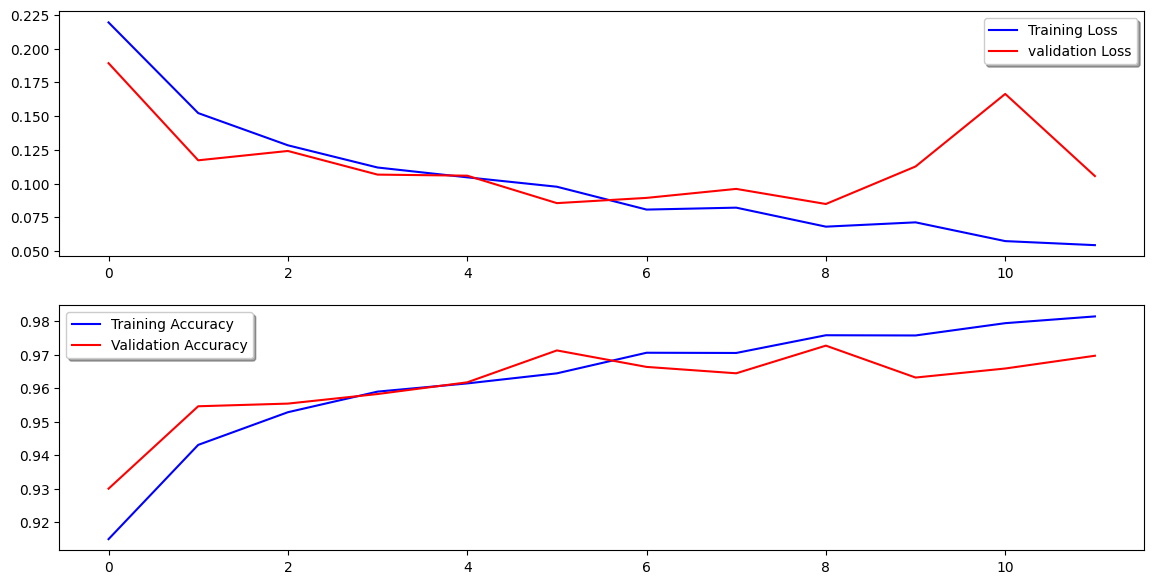

In [ ]:
fig, ax = plt.subplots(2, 1,figsize=(14,7))

ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation Loss",axes=ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_accuracy'], color='r', label="Validation Accuracy")
legend = ax[1].legend(loc='best', shadow=True)


# Saving Trained Model

In [ ]:
from keras.models import save_model,load_model
model.save("wildfire_detection_model")

# Saving Trained Weights

In [ ]:
model.save_weights("wildfire_detection_model_weights.h5")

# Making predictions on the images

In [ ]:
from keras.models import model_from_json
import numpy as np

# load an image file to test

In [ ]:

from keras.utils import load_img,img_to_array



# Loading Saved Model

In [ ]:
model_loaded=load_model("wildfire_detection_model")

# Accuracy on testing Data

In [ ]:
result = model.evaluate(test_generator)

197/197 [==============================] - 44s 220ms/step - loss: 0.0740 - accuracy: 0.9792


# Creating Image Detctor
- It will load image
- Convert it to numpy array
- Expand it's dimension
- As it is a sparse matrix of result get result with highest probability using argmax
- Also it return probability of prediction

In [ ]:
def image_predictor(img):
    list_of_images= np.expand_dims(img,axis=0)
    results= model_loaded.predict(list_of_images)
    single_result= results[0]
    most_likely_class_index= int(np.argmax(single_result))
    class_likelihood= single_result[most_likely_class_index]
    class_label= category[most_likely_class_index]
    return class_likelihood,class_label

In [ ]:
# Print the result
image,label=test_generator.next()
fig,ax=plt.subplots(3,3,figsize=(32,32))
ax=ax.ravel()
j=0
for i,k in zip(image[:9,:,:,:],label[:9]):
    class_likelihood,class_lable=image_predictor(i)
    ax[j].imshow(i)
    ax[j].set_title(f'Predicted: {class_lable} \n Actual: {category[np.argmax(j)]} \n Likelihood: {round(class_likelihood,2)}',fontdict={'size':30})
    j+=1